In [2]:
Lastname = "SOEURT"
Firstname = "Pisey"

Question 2: Social Network Analysis with the Facebook100 Dataset
The smallest network (Caltech) has 762 nodes in the largest connected component
(LCC), and the largest has more than 40000 nodes in the LCC.
Lets use three networks from the FB100: Caltech (with 762 nodes in the LCC), MIT
(which has 6402 nodes in the LCC), and Johns Hopkins (which has 5157 nodes in
the LCC).


(a) For these three networks plot the degree distribution for each of the
three networks that you downloaded. What are you able to conclude from these
degree distributions?

In [4]:
# Install packages
!pip install networkx
!pip install numpy
!pip install matplotlib


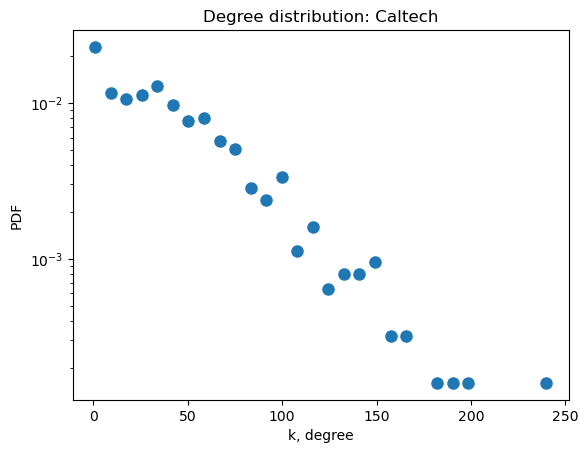

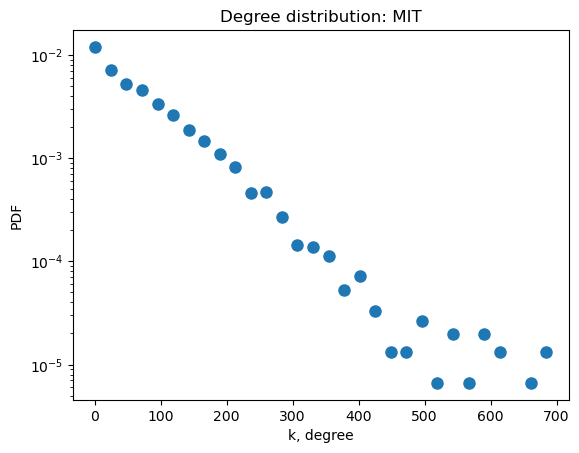

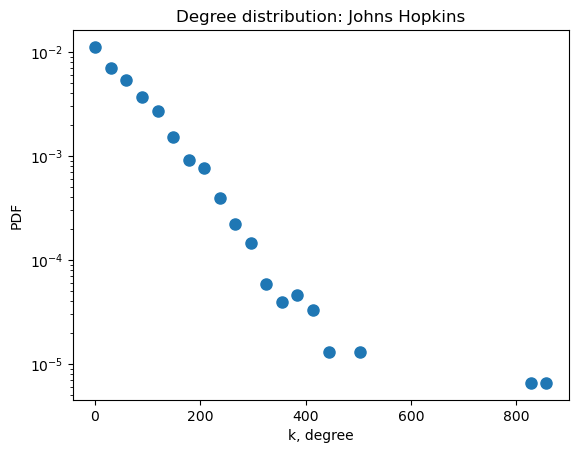

In [8]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

# Function to load the largest connected component (LCC) of a graph
def load_largest_connected_component(file_path):
    graph = nx.read_gml(file_path)
    lcc = max(nx.connected_components(graph), key=len)  # Largest connected component
    return graph.subgraph(lcc)

# Function to compute and plot the degree distribution
def plot_degree_distribution(graph, title):
    # Get degree sequence
    degree_sequence = sorted([d for n, d in graph.degree()], reverse=True)
    
    # Compute histogram for degree distribution
    hist, bin_edges = np.histogram(degree_sequence, bins=30, density=True)
    
    # Plot on a semi-logarithmic scale
    plt.semilogy(bin_edges[:-1], hist, 'o', ms=8)
    plt.xlabel("k, degree")
    plt.ylabel("PDF")
    plt.title(f"Degree distribution: {title}")
    # plt.grid(True, which="both", linestyle="--", linewidth=0.5)
    plt.show()

# Paths to your network data files
caltech_path = "data/Caltech36.gml"
mit_path = "data/MIT8.gml"
johns_hopkins_path = "data/Johns Hopkins55.gml"

# Load the largest connected components of the graphs
caltech_graph = load_largest_connected_component(caltech_path)
mit_graph = load_largest_connected_component(mit_path)
johns_hopkins_graph = load_largest_connected_component(johns_hopkins_path)

# Plot degree distributions for each network
plot_degree_distribution(caltech_graph, "Caltech")
plot_degree_distribution(mit_graph, "MIT")
plot_degree_distribution(johns_hopkins_graph, "Johns Hopkins")


(b) Compute the global clustering coeﬃcient and mean local clustering
coeﬃcient for each of the 3 networks. In addition compute the edge density of
each network. Should either of these networks be construed as sparse? Based on
the density information and the clustering information what can you said about
the graph topology?

In [9]:
# Convert graph to adjacency matrix
def from_dict_to_adj_matrix(G):
    N = len(G)
    adj_matrix = np.zeros((N, N))
    for u in G.keys():
        for v in G[u]:
            adj_matrix[u, v] = 1
    return adj_matrix

# Compute the global clustering coefficient
def global_clustering(A):
    from numpy.linalg import matrix_power
    
    # Number of triangles
    num_triangle = (1 / 6) * np.trace(matrix_power(A, 3))
    
    # Sum and trace of A^2
    A2 = matrix_power(A, 2)
    SumA2 = A2.sum()
    TrA2 = np.trace(A2)
    
    # Number of triples
    num_triple = (1 / 2) * (SumA2 - TrA2)
    
    return 3 * num_triangle / num_triple

# Compute edge density
def compute_edge_density(graph):
    num_nodes = graph.number_of_nodes()
    num_edges = graph.number_of_edges()
    return (2 * num_edges) / (num_nodes * (num_nodes - 1))

# Main function to compute all metrics
def compute_metrics(graph, title):
    # Global clustering coefficient
    A = nx.to_numpy_array(graph)
    gcc = global_clustering(A)
    
    # Mean local clustering coefficient
    mean_local_clustering = nx.average_clustering(graph)
    
    # Edge density
    edge_density = compute_edge_density(graph)
    
    # Print metrics
    print(f"Metrics for {title}:")
    print(f"- Global Clustering Coefficient (GCC): {gcc:.4f}")
    print(f"- Mean Local Clustering Coefficient (MLCC): {mean_local_clustering:.4f}")
    print(f"- Edge Density: {edge_density:.6f}")
    print("\n")
    
    return gcc, mean_local_clustering, edge_density

# Compute and print metrics for each network
caltech_metrics = compute_metrics(caltech_graph, "Caltech")
mit_metrics = compute_metrics(mit_graph, "MIT")
johns_hopkins_metrics = compute_metrics(johns_hopkins_graph, "Johns Hopkins")


Metrics for Caltech:
- Global Clustering Coefficient (GCC): 0.2913
- Mean Local Clustering Coefficient (MLCC): 0.4091
- Edge Density: 0.057429


Metrics for MIT:
- Global Clustering Coefficient (GCC): 0.1803
- Mean Local Clustering Coefficient (MLCC): 0.2724
- Edge Density: 0.012261


Metrics for Johns Hopkins:
- Global Clustering Coefficient (GCC): 0.1932
- Mean Local Clustering Coefficient (MLCC): 0.2690
- Edge Density: 0.014034




(c) For each network, also draw a scatter plot of the degree versus local
clustering coeﬃcient. Based on these calculations as well as your previous ones,
are you able to draw any conclusions about any similarities or diﬀerences between
the tree networks? What other observations can you make?


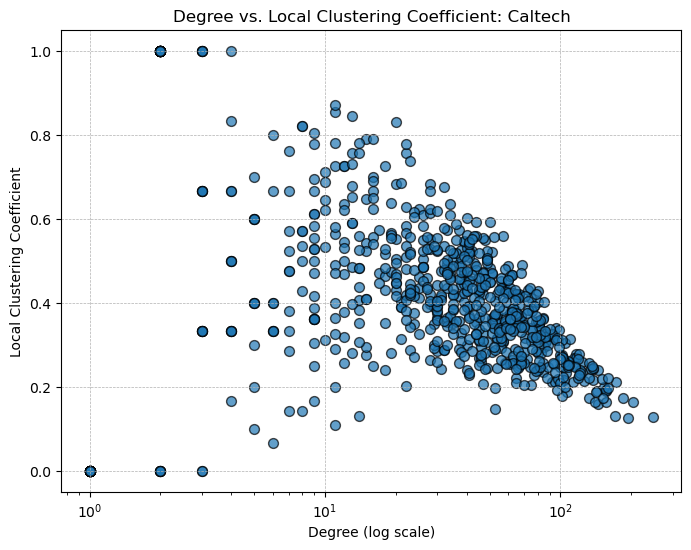

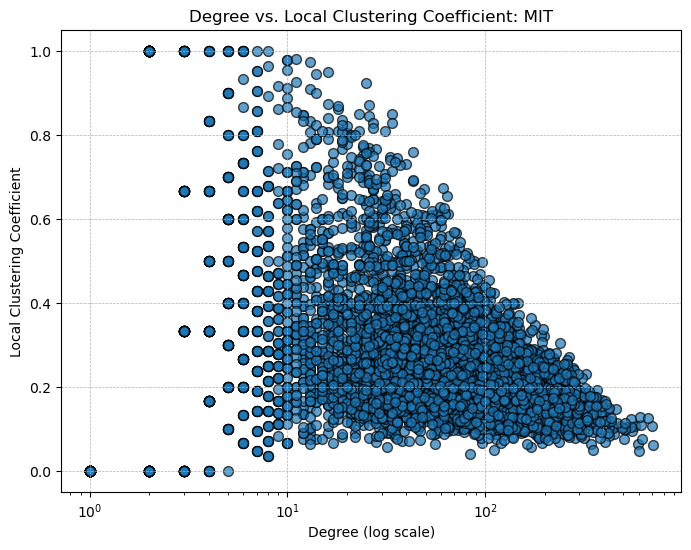

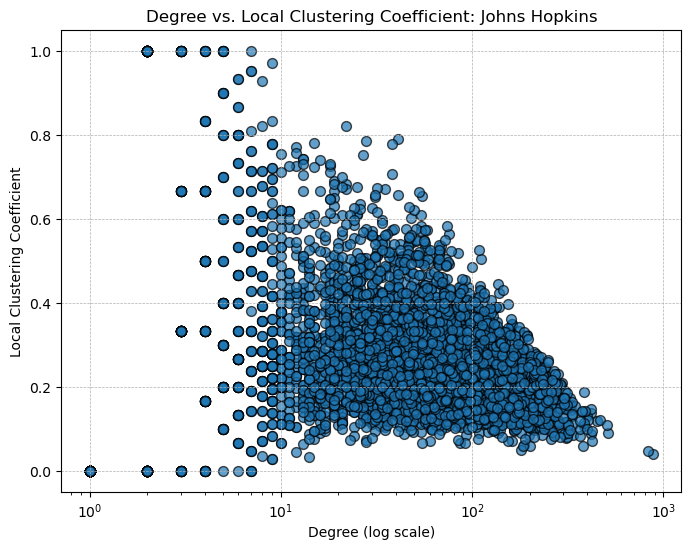

In [11]:
# Function to compute and plot degree vs. local clustering coefficient
def plot_degree_vs_clustering(graph, title):
    # Compute degree and local clustering coefficient for each node
    degree_dict = dict(graph.degree())
    clustering_dict = nx.clustering(graph)
    
    # Prepare data for scatter plot
    degrees = np.array(list(degree_dict.values()))
    clustering_coefficients = np.array(list(clustering_dict.values()))
    
    # Scatter plot
    plt.figure(figsize=(8, 6))
    plt.scatter(degrees, clustering_coefficients, alpha=0.7, edgecolors='k', s=50)
    plt.xscale('log')  # Log scale for degree
    plt.xlabel("Degree (log scale)")
    plt.ylabel("Local Clustering Coefficient")
    plt.title(f"Degree vs. Local Clustering Coefficient: {title}")
    plt.grid(True, linestyle='--', linewidth=0.5)
    plt.show()

# Generate scatter plots for each network
plot_degree_vs_clustering(caltech_graph, "Caltech")
plot_degree_vs_clustering(mit_graph, "MIT")
plot_degree_vs_clustering(johns_hopkins_graph, "Johns Hopkins")


Question 3: Assortativity Analysis with the Facebook100 Dataset
In this question we expect you will compute the assortativity on a large set of graphs
(if possible all the graphs).

(a) Of the FB100 networks, investigate the assortativity patterns for ﬁve vertex attributes: (i) student/faculty status, (ii) major, (iii) vertex degree, and (iiii) dorm, (iiiii) gender. Treat these networks as simple graphs in your analysis. For each vertex attribute, make a scatter plot showing the assortativity versus network size n, with log-linear axes for all 100 networks, and a histogram or density plot showing the distribution of assortativity values. In both ﬁgures, include a line indicating no assortativity. Brieﬂy discuss the degree to which vertices do or do not exhibit assortative mixing on each attribute, and speculate about what kind of processes or tendencies in the formation of Facebook friendships might produce this kind of pattern. For example, below are ﬁgures for assortativity by gender on these networks. The distribution of points spans the line of no assortativity, with some values nearly as far below 0 as others are above 0. However, the gender attributes do appear to be slightly assortative in
these social networks: although all values are within 6% in either direction of 0, the mean assortativity is 0.02, which is slightly above 0. This suggests a slight amount of homophily by gender (like links with like) in the way people friend each other on Facebook, although the tendency is very weak. In some schools,
we see a slight tendency for heterophily (like links with dislike), as one might expect if the networks reﬂected heteronormative dating relationships.



In [ ]:
# Install Package
!pip install seaborn

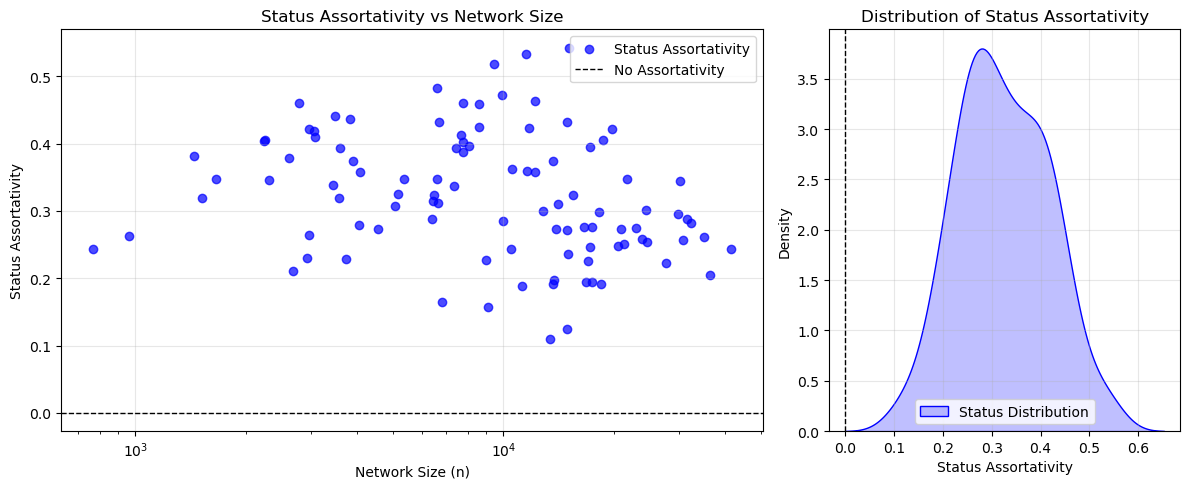

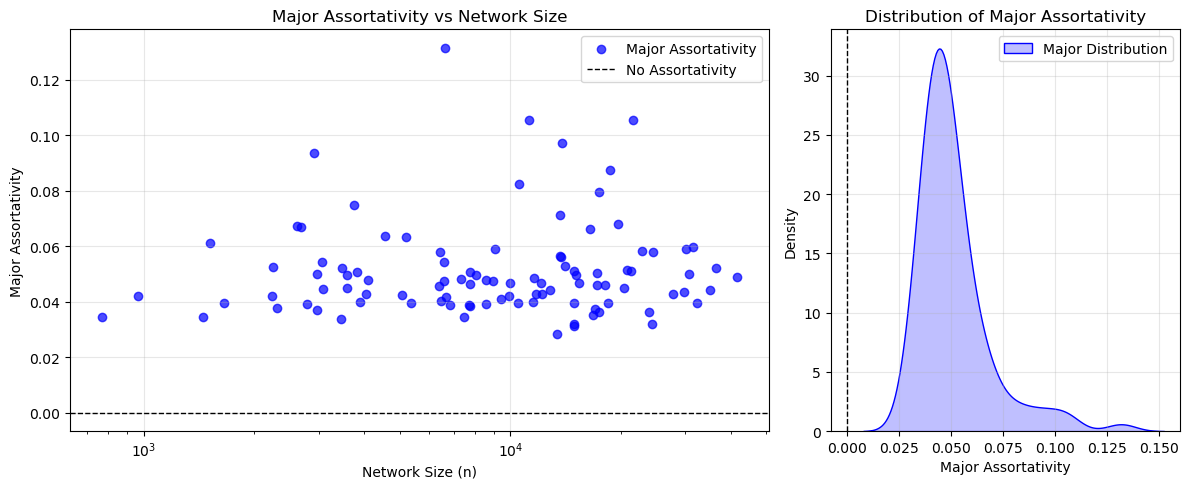

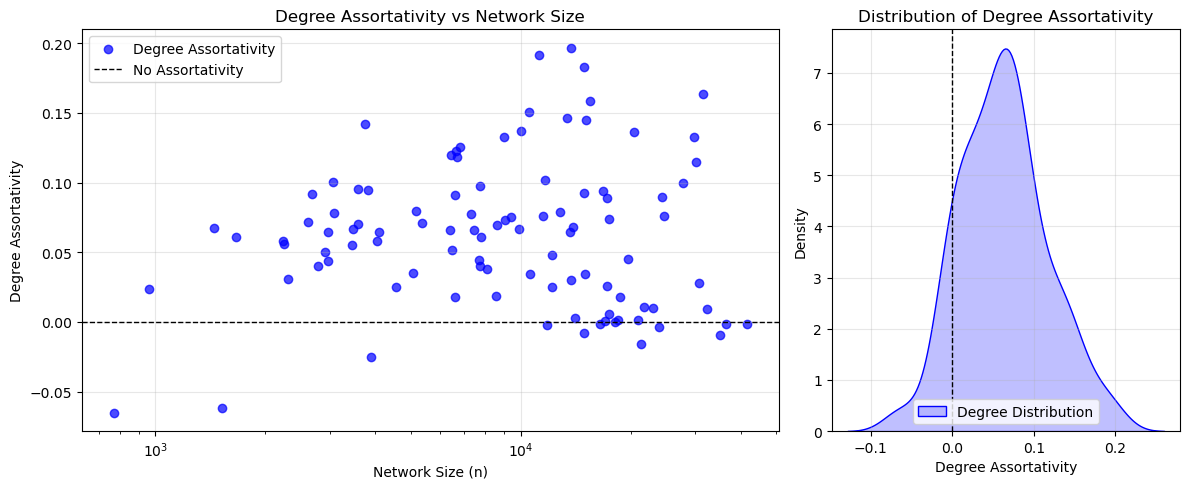

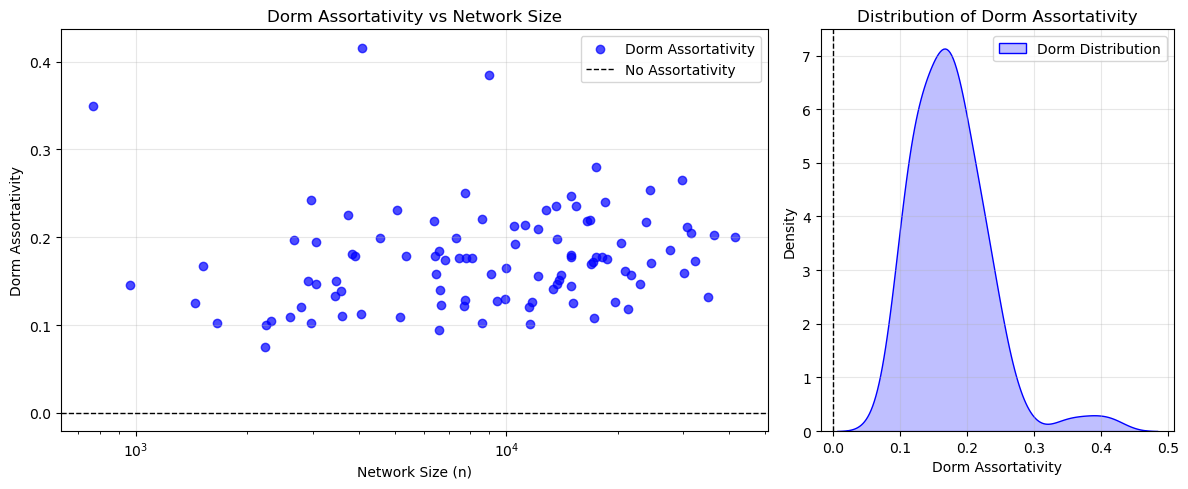

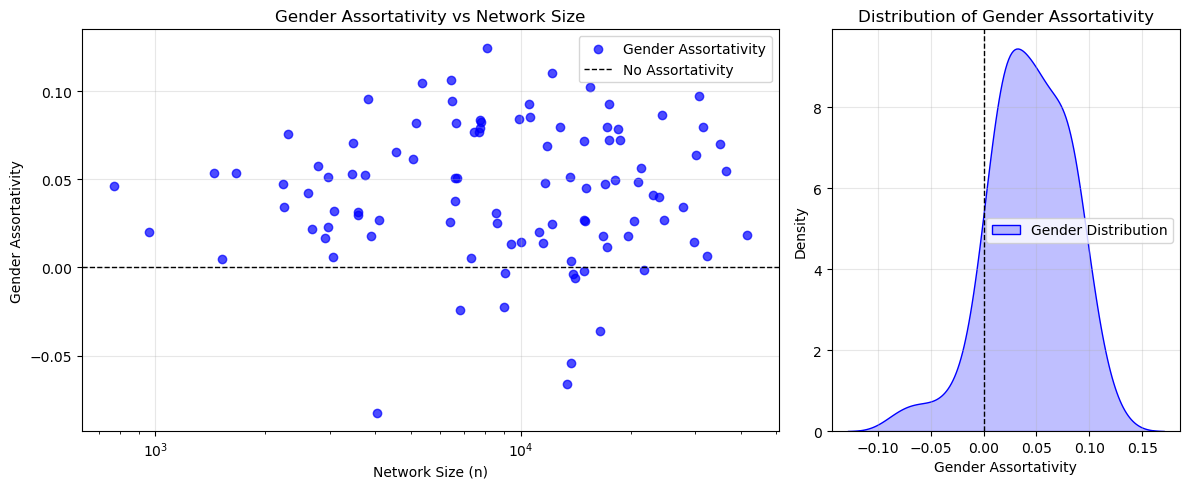

In [49]:
import os
import networkx as nx
import matplotlib.pyplot as plt
import seaborn as sns

# Path to the directory containing FB100 networks
fb100_dir = "data/"

# Initialize dictionary to store assortativity values
assortativity_values = {
    "status": [],
    "major": [],
    "degree": [],
    "dorm": [],
    "gender": [],
    "network_size": []
}

# Helper function to filter valid values (exclude None values)
def filter_valid_values(values, sizes):
    filtered_values = [(v, s) for v, s in zip(values, sizes) if v is not None]
    return zip(*filtered_values)

# Process graphs one by one to save memory
for filename in os.listdir(fb100_dir):
    if filename.endswith(".gml"):
        graph_name = filename.split(".")[0]
        graph_path = os.path.join(fb100_dir, filename)

        # Load graph lazily
        G = nx.read_gml(graph_path)
        n = G.number_of_nodes() 
        assortativity_values["network_size"].append(n)

        # Compute assortativity for each attribute
        try:
            assortativity_values["status"].append(nx.attribute_assortativity_coefficient(G, "student_fac"))
        except KeyError:
            assortativity_values["status"].append(None)

        try:
            assortativity_values["major"].append(nx.attribute_assortativity_coefficient(G, "major_index"))
        except KeyError:
            assortativity_values["major"].append(None)

        assortativity_values["degree"].append(nx.degree_assortativity_coefficient(G))  # Degree assortativity

        try:
            assortativity_values["dorm"].append(nx.attribute_assortativity_coefficient(G, "dorm"))
        except KeyError:
            assortativity_values["dorm"].append(None)

        try:
            assortativity_values["gender"].append(nx.attribute_assortativity_coefficient(G, "gender"))
        except KeyError:
            assortativity_values["gender"].append(None)

# Plot results for each vertex attribute
for attribute in ["status", "major", "degree", "dorm", "gender"]:
    # Filter valid values for plotting
    values, sizes = filter_valid_values(assortativity_values[attribute], assortativity_values["network_size"])

    # Create a figure with two subplots: scatter plot and density plot
    fig, axes = plt.subplots(1, 2, figsize=(12, 5), gridspec_kw={'width_ratios': [2, 1]})

    # Scatter plot: Assortativity vs Network Size
    axes[0].scatter(sizes, values, alpha=0.7, color='blue', label=f"{attribute.capitalize()} Assortativity")
    axes[0].axhline(0, color="black", linestyle="--", linewidth=1, label="No Assortativity")
    axes[0].set_xscale("log")  # Use log scale for network size
    axes[0].set_xlabel("Network Size (n)")
    axes[0].set_ylabel(f"{attribute.capitalize()} Assortativity")
    axes[0].set_title(f"{attribute.capitalize()} Assortativity vs Network Size")
    axes[0].legend()
    axes[0].grid(alpha=0.3)

    # Density plot: Distribution of Assortativity
    sns.kdeplot(values, fill=True, ax=axes[1], color='blue', label=f"{attribute.capitalize()} Distribution")
    axes[1].axvline(0, color="black", linestyle="--", linewidth=1)  # Line for no assortativity
    axes[1].set_xlabel(f"{attribute.capitalize()} Assortativity")
    axes[1].set_title(f"Distribution of {attribute.capitalize()} Assortativity")
    axes[1].legend()
    axes[1].grid(alpha=0.3)

    # display the plots
    plt.tight_layout()
    plt.show()


Question 4: Link prediction
In this question we expect you will compute the link prediction algorithms on a large
set of graphs (> 10).
(b) Implement the following link prediction metrics: common neighbors, jaccard, Adamic/Adar. We use the scikit-learn API as an example for our implementation of the link prediction metrics. Please use the implementation (in listing. 1) as an example. Your implementation should inherit from the class LinkPrediction deﬁned in listing.


In [65]:
from abc import ABC, abstractmethod
import math

class LinkPrediction(ABC):
    def __init__(self, graph):

        self.graph = graph
        self.N = len(graph)  # Number of nodes in the graph

    def neighbors(self, v):
        return list(self.graph.neighbors(v))

    @abstractmethod
    def fit(self, u, v):
        """
        Fit method to calculate the link prediction score
        """
        raise NotImplementedError("Fit must be implemented")

class CommonNeighbors(LinkPrediction):
    def fit(self, u, v):
        neighbors_u = set(self.neighbors(u))
        neighbors_v = set(self.neighbors(v))
        return len(neighbors_u & neighbors_v)

class JaccardCoefficient(LinkPrediction):
    def fit(self, u, v):

        neighbors_u = set(self.neighbors(u))
        neighbors_v = set(self.neighbors(v))
        intersection = neighbors_u & neighbors_v
        union = neighbors_u | neighbors_v
        return len(intersection) / len(union) if union else 0.0

class AdamicAdar(LinkPrediction):
    def fit(self, u, v):

        neighbors_u = set(self.neighbors(u))
        neighbors_v = set(self.neighbors(v))
        common_neighbors = neighbors_u & neighbors_v
        score = 0
        for z in common_neighbors:
            degree = len(self.neighbors(z))
            if degree > 1:
                score += 1 / math.log(degree)
        return score


In [69]:
import networkx as nx

# Create a sample graph
G = nx.karate_club_graph()

# Instantiate link prediction metrics
common_neighbors = CommonNeighbors(G)
jaccard = JaccardCoefficient(G)
adamic_adar = AdamicAdar(G)

u, v = 0, 1  # Nodes to calculate metrics for
print("Common Neighbors Score:", common_neighbors.fit(u, v))
print("Jaccard Coefficient Score:", jaccard.fit(u, v))
print("Adamic/Adar Score:", adamic_adar.fit(u, v))


Common Neighbors Score: 7
Jaccard Coefficient Score: 0.3888888888888889
Adamic/Adar Score: 6.130716871863356


(c) Evaluating a link predictor

(d) Choose a couple of graphs in the facebook100 dataset run and evaluate each link predictor on them, and conclude on the eﬃciency of the following metrics: common neighbors, jaccard, Adamic/Adar.


In [110]:
import os
import random
import networkx as nx
from itertools import combinations
import math
import pandas as pd

# Define link prediction metrics
class LinkPrediction:
    def __init__(self, graph):
        self.graph = graph

    def neighbors(self, node):
        return set(self.graph.neighbors(node))

class CommonNeighbors(LinkPrediction):
    def fit(self, u, v):
        return len(self.neighbors(u) & self.neighbors(v))

class JaccardCoefficient(LinkPrediction):
    def fit(self, u, v):
        intersection = self.neighbors(u) & self.neighbors(v)
        union = self.neighbors(u) | self.neighbors(v)
        return len(intersection) / len(union) if union else 0.0

class AdamicAdar(LinkPrediction):
    def fit(self, u, v):
        common_neighbors = self.neighbors(u) & self.neighbors(v)
        score = sum(1 / math.log(len(self.neighbors(w))) for w in common_neighbors if len(self.neighbors(w)) > 1)
        return score

# Evaluate link prediction
def evaluate_link_prediction(graph, removed_edges, k_values, fraction):
    node_pairs = list(combinations(graph.nodes(), 2))
    predictors = {
        "Common Neighbors": CommonNeighbors(graph),
        "Jaccard Coefficient": JaccardCoefficient(graph),
        "Adamic/Adar": AdamicAdar(graph),
    }

    results = []
    for name, predictor in predictors.items():
        scores = [(u, v, predictor.fit(u, v)) for u, v in node_pairs if not graph.has_edge(u, v)]
        scores = sorted(scores, key=lambda x: x[2], reverse=True)
        for k in k_values:
            top_k_edges = {(u, v) for u, v, _ in scores[:k]}
            true_positives = len(top_k_edges & removed_edges)
            precision = true_positives / k
            recall = true_positives / len(removed_edges)
            results.append({
                "Fraction": fraction,
                "Predictor": name,
                "TopK": k,
                "Precision": precision,
                "Recall": recall
            })
            print(f"Metrics for {name} (top@{k}): Precision = {precision:.4f}, Recall = {recall:.4f}")
    return results

# Simulate edge removal and run evaluation
def simulate_link_prediction(graph, fractions, k_values):
    all_results = []
    for fraction in fractions:
        print(f"\nEvaluating for fraction {fraction}:")
        num_edges_to_remove = int(fraction * graph.number_of_edges())
        removed_edges = set(random.sample(list(graph.edges()), num_edges_to_remove))
        test_graph = graph.copy()
        test_graph.remove_edges_from(removed_edges)
        results = evaluate_link_prediction(test_graph, removed_edges, k_values, fraction)
        all_results.extend(results)
    return all_results

# Main execution
if __name__ == "__main__":
    directory = "data/"  # Adjust to your dataset path
    fractions = [0.05, 0.1, 0.15, 0.2]
    k_values = [50, 100, 200, 400]
    all_results = []

    # Specific list of 11 qualified graphs
    # qualified_graphs = [
    #     "USFCA72.gml", "Bucknell39.gml", "Swarthmore42.gml", "Middlebury45.gml",
    #     "Haverford76.gml", "Rochester38.gml", "Colgate88.gml", "Simmons81.gml",
    #     "Howard90.gml", "Temple83.gml", "Bingham82.gml"
    # ]

    qualified_graphs = [
        "USFCA72.gml", "Swarthmore42.gml"
    ]

    for filename in qualified_graphs:
        file_path = os.path.join(directory, filename)
        print(f"Processing {filename}")
        G = nx.read_gml(file_path)
        print(f"Number of nodes: {G.number_of_nodes()}, Number of edges: {G.number_of_edges()}")
        results = simulate_link_prediction(G, fractions, k_values)
        all_results.extend(results)

    # # Save results to CSV
    # results_df = pd.DataFrame(all_results)
    # results_df.to_csv("link_prediction_results.csv", index=False)
    # print("\nResults saved to 'link_prediction_results.csv'.")


Processing USFCA72.gml
Number of nodes: 2682, Number of edges: 65252

Evaluating for fraction 0.05:
Metrics for Common Neighbors (top@50): Precision = 0.5000, Recall = 0.0077
Metrics for Common Neighbors (top@100): Precision = 0.4700, Recall = 0.0144
Metrics for Common Neighbors (top@200): Precision = 0.4050, Recall = 0.0248
Metrics for Common Neighbors (top@400): Precision = 0.3100, Recall = 0.0380
Metrics for Jaccard Coefficient (top@50): Precision = 0.3800, Recall = 0.0058
Metrics for Jaccard Coefficient (top@100): Precision = 0.3400, Recall = 0.0104
Metrics for Jaccard Coefficient (top@200): Precision = 0.3250, Recall = 0.0199
Metrics for Jaccard Coefficient (top@400): Precision = 0.3125, Recall = 0.0383
Metrics for Adamic/Adar (top@50): Precision = 0.5000, Recall = 0.0077
Metrics for Adamic/Adar (top@100): Precision = 0.5200, Recall = 0.0159
Metrics for Adamic/Adar (top@200): Precision = 0.3950, Recall = 0.0242
Metrics for Adamic/Adar (top@400): Precision = 0.3350, Recall = 0.0411

Question 5: Find missing labels with the label propagation algorithms
In this question we expect you will compute the label propagation algorithm on a
large set of graphs (> 10).

(b) Implement in python the label propagation algorithm, please consider pytorch and networkx
for the development of your algorithm.

(c) Choose a network from The Facebook100 dataset and randomly select
10%, 20%, and 30% of of the node attributes of the network to be removed.
Use the label propagation algorithm you implemented to recover the missing
attributes. Perform this operation for each of the following attributes : ”dorm”,
”major”, ”gender”.

(d) For each case of the following percentage of missing attributes: 10%,
20% and 30% and for each of the following attributes: the ”dorm”, ”major”,
”gender” show the mean absolute error and accuracy score (as deﬁned in eq. 1)
of the label propagation algorithm as in the example provided in Table 1 for
the Duke University Facebook network. Note we can use the formula eq. 1
for computing the accuracy. However, a better approach would have been to
compute the F1-score

(e) Conclude on the accuracy of the label propagation algorithm for dif-
ferent labels, could you explain why is there such diﬀerence in the accuracy
between each type of label ?


In [1]:
# Install Packages 
!pip install scikit-learn
!pip install tabulate

In [2]:
import networkx as nx
import random
from sklearn.metrics import accuracy_score, mean_absolute_error
from tabulate import tabulate

def label_propagation_algorithm(graph, attribute, known_fraction):
    """
    Perform Label Propagation Algorithm to predict missing attributes.

    Parameters:
        graph (nx.Graph): The network graph.
        attribute (str): The node attribute to predict (e.g., "dorm").
        known_fraction (float): Fraction of nodes with known attributes.

    Returns:
        tuple: Accuracy and mean absolute error of the predictions.
    """
    # Step 1: Prepare the graph and remove attributes randomly
    nodes = list(graph.nodes())
    random.shuffle(nodes)
    num_known = int(known_fraction * len(nodes))
    known_nodes = nodes[:num_known]
    unknown_nodes = nodes[num_known:]

    # Save original attributes and remove them from unknown nodes
    original_attributes = nx.get_node_attributes(graph, attribute)
    for node in unknown_nodes:
        graph.nodes[node][attribute] = None

    # Step 2: Label propagation
    is_converged = False
    while not is_converged:
        is_converged = True
        for node in unknown_nodes:
            neighbors = list(graph.neighbors(node))
            neighbor_labels = [graph.nodes[neighbor][attribute] for neighbor in neighbors if graph.nodes[neighbor][attribute] is not None]
            if neighbor_labels:
                # Predict the most common label among neighbors
                predicted_label = max(set(neighbor_labels), key=neighbor_labels.count)
                if graph.nodes[node][attribute] != predicted_label:
                    graph.nodes[node][attribute] = predicted_label
                    is_converged = False

    # Step 3: Evaluate accuracy and MAE
    predicted_attributes = nx.get_node_attributes(graph, attribute)
    y_true = [original_attributes[node] for node in unknown_nodes]
    y_pred = [predicted_attributes[node] for node in unknown_nodes]

    accuracy = accuracy_score(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred) if all(isinstance(val, (int, float)) for val in y_true + y_pred) else None

    return accuracy, mae

if __name__ == "__main__":
    G = nx.read_gml("data/Colgate88.gml")
    attributes = ["dorm", "major_index", "gender"]
    attribute_labels = {"dorm": "Dorm", "major_index": "Major", "gender": "Gender"}
    fractions = [0.1, 0.2, 0.3, 0.4]

    results = {attr: {"accuracy": [], "mae": []} for attr in attributes}

    for attr in attributes:
        for fraction in fractions:
            accuracy, mae = label_propagation_algorithm(G, attr, 1 - fraction)
            results[attr]["accuracy"].append(accuracy)
            results[attr]["mae"].append(mae)

    print("Accuracy and Mean Absolute Error")
    table_data_accuracy = []
    table_data_mae = []

    for attr in attributes:
        table_data_accuracy.append([attribute_labels[attr]] + [f"{acc:.3f}" for acc in results[attr]["accuracy"]])
        table_data_mae.append([attribute_labels[attr]] + [f"{mae:.3f}" if mae is not None else "N/A" for mae in results[attr]["mae"]])

    print("\nAccuracy Table:")
    print(tabulate(table_data_accuracy, headers=["Attribute"] + [str(f) for f in fractions], tablefmt="grid"))

    print("\nMean Absolute Error Table:")
    print(tabulate(table_data_mae, headers=["Attribute"] + [str(f) for f in fractions], tablefmt="grid"))


Accuracy and Mean Absolute Error

Accuracy Table:
+-------------+-------+-------+-------+-------+
| Attribute   |   0.1 |   0.2 |   0.3 |   0.4 |
+=============+=======+=======+=======+=======+
| Dorm        | 0.47  | 0.515 | 0.543 | 0.645 |
+-------------+-------+-------+-------+-------+
| Major       | 0.266 | 0.274 | 0.419 | 0.604 |
+-------------+-------+-------+-------+-------+
| Gender      | 0.59  | 0.626 | 0.623 | 0.705 |
+-------------+-------+-------+-------+-------+

Mean Absolute Error Table:
+-------------+---------+---------+---------+---------+
| Attribute   |     0.1 |     0.2 |     0.3 |     0.4 |
+=============+=========+=========+=========+=========+
| Dorm        |  43.774 |  43.01  |  38.463 |  28.526 |
+-------------+---------+---------+---------+---------+
| Major       | 126.819 | 181.369 | 149.905 | 102.398 |
+-------------+---------+---------+---------+---------+
| Gender      |   0.418 |   0.383 |   0.378 |   0.295 |
+-------------+---------+---------+-------

Question 6: Communities detection with the FB100 datasets
Formulate a research question about group formation among students in the FB100
dataset. To validate your hypothesis, use only a few universities and a community
detection algorithm of your choice to extract the diﬀerent groups of students. To help
you formulate a research question.

(a) Formulate a research question about group formation in FB100 and
explain your hypothesis.

(b) Write the code to validate your research question and show the result
using a few selected community detection algorithms and graphs.

(c) Explain the results and conclude whether your experiment conﬁrms
your initial hypothesis.



(a) Research Question:
Do students in the FB100 dataset form communities primarily based on their dormitory assignments or their academic majors?

Hypothesis:
Students in the FB100 dataset are more likely to form communities based on shared dormitory assignments than academic majors. Physical proximity and shared living environments foster stronger social bonds compared to academic affiliations.


In [178]:
# Install packages
!pip install python-louvain


  Preparing metadata (setup.py) ... done
  Created wheel for python-louvain: filename=python_louvain-0.16-py3-none-any.whl size=9388 sha256=c5c8a0331f7783ac3e5af5dbfdd24143bc94a19b3a82158333015642b7ce0c27
  Stored in directory: /Users/pisey/Library/Caches/pip/wheels/40/f1/e3/485b698c520fa0baee1d07897abc7b8d6479b7d199ce96f4af
Successfully built python-louvain


Louvain Results for dorm:
+--------------+--------+-------------------------------------------------------------------+
| Community    |   Size | Attribute Distribution                                            |
+==============+========+===================================================================+
| Community 0  |    115 | {169: 93, 0: 14, 167: 1, 165: 2, 170: 3, 172: 1, 171: 1}          |
+--------------+--------+-------------------------------------------------------------------+
| Community 1  |      2 | {167: 1, 0: 1}                                                    |
+--------------+--------+-------------------------------------------------------------------+
| Community 2  |    128 | {171: 58, 167: 45, 0: 22, 172: 2, 169: 1}                         |
+--------------+--------+-------------------------------------------------------------------+
| Community 3  |     83 | {168: 63, 167: 2, 0: 14, 171: 1, 165: 1, 170: 1, 172: 1}          |
+--------------+--------+---------

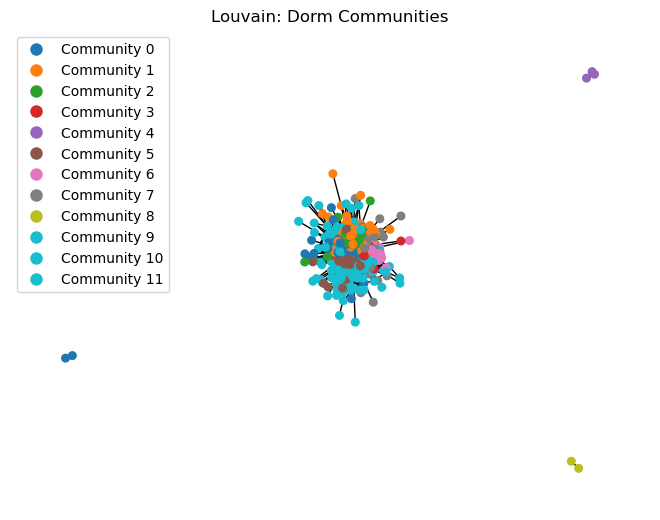

Louvain Results for major:
+--------------+--------+--------------------------+
| Community    |   Size | Attribute Distribution   |
+==============+========+==========================+
| Community 0  |    116 | {None: 116}              |
+--------------+--------+--------------------------+
| Community 1  |      2 | {None: 2}                |
+--------------+--------+--------------------------+
| Community 2  |    127 | {None: 127}              |
+--------------+--------+--------------------------+
| Community 3  |     83 | {None: 83}               |
+--------------+--------+--------------------------+
| Community 4  |     20 | {None: 20}               |
+--------------+--------+--------------------------+
| Community 5  |      3 | {None: 3}                |
+--------------+--------+--------------------------+
| Community 6  |     92 | {None: 92}               |
+--------------+--------+--------------------------+
| Community 7  |     17 | {None: 17}               |
+--------------+---

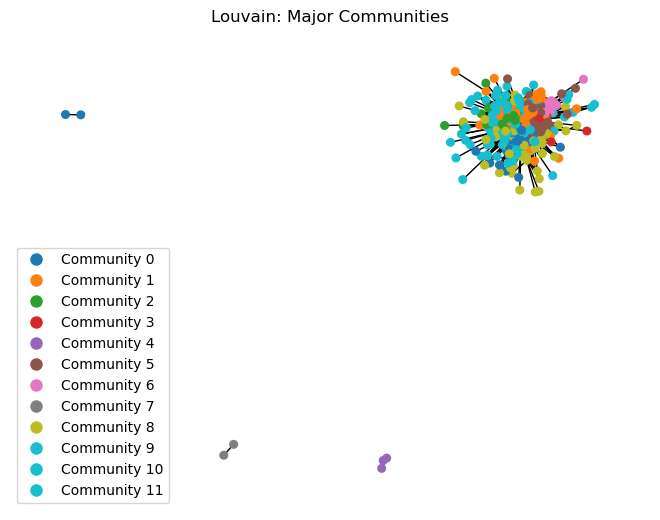

In [184]:
import networkx as nx
from community import community_louvain
import matplotlib.pyplot as plt
from tabulate import tabulate
from collections import Counter

# Function for Louvain community detection
def detect_communities_louvain(graph, attribute):
    # Apply Louvain method
    partition = community_louvain.best_partition(graph)
    nx.set_node_attributes(graph, partition, "community")
    
    # Collect community data
    community_data = {label: [] for label in set(partition.values())}
    for node, label in partition.items():
        community_data[label].append(graph.nodes[node].get(attribute))
    
    # Count attribute distribution
    return {k: dict(Counter(v)) for k, v in community_data.items()}

# Visualize communities
def visualize_communities(graph, title="Community Detection"):
    """
    Visualize communities detected in the graph with labeled colors.

    Parameters:
        graph (nx.Graph): The network graph with 'community' attributes.
        title (str): Title of the visualization.
    """
    pos = nx.spring_layout(graph)
    communities = nx.get_node_attributes(graph, 'community')
    
    # Map communities to colors
    unique_communities = set(communities.values())
    community_colors = {comm: idx for idx, comm in enumerate(unique_communities)}
    color_map = [community_colors[communities[node]] for node in graph.nodes()]
    
    # Draw graph
    nx.draw(
        graph,
        pos,
        node_color=color_map,
        cmap=plt.get_cmap('tab10'),
        node_size=30,
        with_labels=False
    )
    
    # Add legend
    legend_labels = {value: key for key, value in community_colors.items()}
    plt.legend(
        handles=[plt.Line2D([0], [0], marker='o', color='w', label=f"Community {legend_labels[color]}",
                            markerfacecolor=plt.get_cmap('tab10')(color/10), markersize=10) 
                 for color in legend_labels],
        loc="best"
    )
    plt.title(title)
    plt.show()

# Main execution
if __name__ == "__main__":
    # Load the FB100 dataset
    G = nx.read_gml("data/Caltech36.gml")  # Update with the correct path

    # Attributes to analyze
    attributes = ["dorm", "major"]

    for attribute in attributes:
        # Perform Louvain community detection
        louvain_results = detect_communities_louvain(G, attribute)
        
        # Display results
        print(f"Louvain Results for {attribute}:")
        print(tabulate(
            [[f"Community {k}", sum(v.values()), v] for k, v in louvain_results.items()],
            headers=["Community", "Size", "Attribute Distribution"],
            tablefmt="grid"
        ))

        # Visualize the communities with improved clarity
        visualize_communities(G, title=f"Louvain: {attribute.capitalize()} Communities")
